# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Introduction and Business Problem

**Introduction:**
- Berlin is Germany is a big city with twelve boroughs that are made up of a total of 96 officially recognized localities. There are some upcoming neighborhood which are packed with restaurants, night life and hip people. For people that are new to Berlin it can be hard to figure out what restaurants are worth going to and where they are. For people that used to live in Berlin or are visiting, how do they know what's the best places to get some good food or drinks?
    
    
    
**Business Problem:**
- For this project, I am going to create a simple guide on where to eat based on Foursquare ratings, price, category and geographic location data for restaurants in Berlin. I will then cluster these restaurants based on their similarities so that a user can easily check out what kind of food they are looking for and in what price range.    

## Data Required

For this assignment, I will be utilizing the Foursquare API to pull the following location data on restaurants in Berlin, Germany:
- Venue Name
- Venue ID
- Venue Location
- Venue Category
- Rating
- Price


## Data Acquisition Approach

To acquire the data mentioned above, I will need to do the following:

- Get geolocator lat and long coordinates for Berlin, Germany
- Get a list of all venues
- Get venue IDs for each venue
- Pull venue name, location, category, rating, price

## Data Usage Approach - Clustering

I will use the gathered data and create a k-means clustering algorithm that groups restaurants into 4-5 clusters so that people looking to eat in Berlin can easily see which restaurants will provide that food they are looking for.

## 1. Get the Data
### Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'X0FZUCBWGJIBXFQLTLBZAYK44OMASVPVK0J5IAUZVN5K3PJ0' # your Foursquare ID
CLIENT_SECRET = 'ZKW4AS4C3FTOQLCVHIJQOT05QSKVNOEZZDRWFDOX3RULDEWC' # your Foursquare Secret
ACCESS_TOKEN = '4GNWIASCMP00QL1KJAWT1GO2L0QEMW5RDH0IBLGBK1NIBUZE' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X0FZUCBWGJIBXFQLTLBZAYK44OMASVPVK0J5IAUZVN5K3PJ0
CLIENT_SECRET:ZKW4AS4C3FTOQLCVHIJQOT05QSKVNOEZZDRWFDOX3RULDEWC


### Read Excel with the name of the Neighborhoods of each Borough

In [3]:
#read excel with panda function
df_berlin_neigh = pd.read_excel('Berlin_Borough_Neighborhoods.xlsx')
print(df_berlin_neigh.shape)
df_berlin_neigh.head()

(96, 2)


,Borough,Neighborhoods
0,Mitte,Mitte
1,Mitte,Tiergarten
2,Mitte,Wedding
3,Mitte,Moabit
4,Mitte,Hansaviertel


### Use geopy library to get the latitude and longitude values of each neighborhood

In [4]:
# define the dataframe columns
column_names = ['Neighborhoods', 'Latitude', 'Longitude'] 

# instantiate the dataframe
coordinates_neigh = pd.DataFrame(columns=column_names)

for index, row in df_berlin_neigh.iterrows():
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(row['Neighborhoods'] + ', Berlin')
    latitude = location.latitude
    longitude = location.longitude
    coordinates_neigh = coordinates_neigh.append({
                                            'Neighborhoods': row['Neighborhoods'],
                                            'Latitude': latitude,
                                            'Longitude': longitude}, ignore_index=True)
    
coordinates_neigh

,Neighborhoods,Latitude,Longitude
0,Mitte,52.517885,13.404060
1,Tiergarten,52.509778,13.357260
2,Wedding,52.550123,13.341970
3,Moabit,52.530102,13.342542
4,Hansaviertel,52.519123,13.341872
5,Gesundbrunnen,52.550920,13.384846
6,Friedrichshain,52.512215,13.450290
7,Kreuzberg,52.497644,13.411914
8,Prenzlauer Berg,52.539847,13.428565
9,Weißensee,52.554619,13.463002


### Create map of neighborhoods using latitude and longitude values

In [51]:
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, district in zip(coordinates_neigh['Latitude'], coordinates_neigh['Longitude'], coordinates_neigh['Neighborhoods']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

## 2. Explore Neighborhoods 

### Create a function to repeat to get all venues in each neighborhood

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
        
       # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhoods', 
                  'Neighborhoods Latitude', 
                  'Neighborhoods Longitude',
                  'Venue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
berlin_venues = getNearbyVenues(names=coordinates_neigh['Neighborhoods'],
                                   latitudes=coordinates_neigh['Latitude'],
                                   longitudes=coordinates_neigh['Longitude']
                                  )

Mitte
Tiergarten
Wedding
Moabit
Hansaviertel
Gesundbrunnen                                
Friedrichshain                                  
Kreuzberg
Prenzlauer Berg
Weißensee
Blankenburg
Heinersdorf
Karow
Stadtrandsiedlung Malchow            
Pankow
Blankenfelde
Buch
Französisch Buchholz
Niederschönhausen
Rosenthal
Wilhelmsruh
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord                        
Halensee
Spandau
Haselhorst
Siemensstadt
Staaken
Gatow
Kladow
Hakenfelde
Falkenhagener Feld                        
Wilhelmstadt
Steglitz
Lichterfelde                                      
Lankwitz
Zehlendorf
Dahlem
Nikolassee
Wannsee
Schöneberg                                      
Friedenau
Tempelhof
Mariendorf
Marienfelde
Lichtenrade
Neukölln
Britz
Buckow
Rudow
Gropiusstadt                                      
Alt-Treptow
Plänterwald
Baumschulenweg
Johannisthal
Niederschöneweide                          
Altglienicke
Adlershof
Bohnsdorf
Oberschöneweide
Köpe

### Filter for just restaurants in Venue Category

In [8]:
berlin_rest = berlin_venues[berlin_venues['Venue Category'].str.contains('Restaurant')]
print(berlin_rest.shape)
berlin_rest

(261, 8)


,Neighborhoods,Neighborhoods Latitude,Neighborhoods Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
15,Mitte,52.517885,13.404060,5a958ec0e4c459472938359f,Wilde Matilde,52.517475,13.405384,German Restaurant
17,Mitte,52.517885,13.404060,584c882dd702824c51e2be9a,Balthazar,52.515913,13.406160,Restaurant
27,Mitte,52.517885,13.404060,59eb78736bdee6069ed97d77,EL COLMADO,52.519412,13.409681,Spanish Restaurant
33,Tiergarten,52.509778,13.357260,4cc6c1d5c844721ea24ef601,Kantine im Felleshus,52.508555,13.350813,Scandinavian Restaurant
38,Tiergarten,52.509778,13.357260,4cdae7f2930af04dfbb08797,Eventlocation Alte Pumpe,52.505481,13.358203,German Restaurant
63,Moabit,52.530102,13.342542,5704ef8e498e01d01a38f46f,Habe die Ehre,52.528024,13.338907,Austrian Restaurant
67,Moabit,52.530102,13.342542,4b3675bcf964a520f03525e3,Lichtblick,52.532392,13.341196,Restaurant
70,Moabit,52.530102,13.342542,50b0c5c6e4b0a71212006b47,Alimentari e Vini,52.527793,13.338373,Italian Restaurant
73,Moabit,52.530102,13.342542,4bbe38a279eaef3b66daaec3,Dicker Engel,52.532382,13.340826,German Restaurant
77,Moabit,52.530102,13.342542,54df15c6498ed36be495c287,geh Veg,52.532178,13.342044,Vegetarian / Vegan Restaurant


### Get all the price and ratings for each restaurant with venue id

In [11]:
berlin_rest_price = berlin_rest.copy()

# initialise values
berlin_rest_price['Rating'] = 0
berlin_rest_price['Price'] = 0 
# loop venues
for ind in np.arange(berlin_rest_price.shape[0]):
    br = berlin_rest_price.iloc[ind]
    brID = br['Venue ID']
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            brID, CLIENT_ID, CLIENT_SECRET, VERSION)
    try:
        results = requests.get(url).json() 
        berlin_rest_price.iloc[ind,8]=results['response']['venue']['rating']
        berlin_rest_price.iloc[ind,9]=results['response']['venue']['price']['tier']
        print(results['response']['venue']['name'] , ' Rating: ', results['response']['venue']['rating'], ' Price: ', results['response']['venue']['price']['tier'] )
    except:
        pass



Wilde Matilde  Rating:  7.4  Price:  2
Balthazar  Rating:  7.4  Price:  1
EL COLMADO  Rating:  7.7  Price:  1
Kantine im Felleshus  Rating:  7.5  Price:  2
Eventlocation Alte Pumpe  Rating:  5.9  Price:  2
Lichtblick  Rating:  7.5  Price:  1
Alimentari e Vini  Rating:  7.9  Price:  2
Dicker Engel  Rating:  7.3  Price:  2
geh Veg  Rating:  7.2  Price:  2
Naninka  Rating:  7.5  Price:  1
Valladares  Rating:  8.0  Price:  2
Marjan Grill  Rating:  8.4  Price:  2
Keyfi Sefa Berlin  Rating:  5.8  Price:  1
DaGiorgio's  Rating:  8.0  Price:  2
Yöre Gözleme ve Manti Evi  Rating:  8.4  Price:  1
Shalimar Restaurant  Rating:  7.7  Price:  2
Baldon  Rating:  7.8  Price:  1
Imren Grill  Rating:  8.0  Price:  1
Altin Saray  Rating:  7.1  Price:  1
Oase  Rating:  8.8  Price:  1
goodies  Rating:  8.2  Price:  2
Akkawy  Rating:  8.6  Price:  2
Trattoria Portofino  Rating:  7.6  Price:  2
Fatoush  Rating:  8.7  Price:  2
Picoteo  Rating:  9.0  Price:  2
Obermaier Restaurant-Salon  Rating:  8.7  Price: 

### Check how many restaurants were actually rated 

#### Only 38 got a price rating and 43 a rating of the food quality out of 261 restaurants --> We are not using prices and ratings for our clustering anymore. Just categories.

In [53]:
print(berlin_rest_price[berlin_rest_price['Price'] > 0].shape)
print(berlin_rest_price[berlin_rest_price['Rating'] > 0].shape)
print(berlin_rest.shape)

(38, 10)
(43, 10)
(261, 8)


In [54]:
berlin_rest.groupby('Neighborhoods').count()

,Neighborhoods Latitude,Neighborhoods Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhoods,,,,,,,
Adlershof,3,3,3,3,3,3,3
Alt-Hohenschönhausen,3,3,3,3,3,3,3
Alt-Treptow,6,6,6,6,6,6,6
Blankenburg,1,1,1,1,1,1,1
Bohnsdorf,1,1,1,1,1,1,1
Borsigwalde,1,1,1,1,1,1,1
Britz,1,1,1,1,1,1,1
Buch,2,2,2,2,2,2,2
Charlottenburg,10,10,10,10,10,10,10


## 3. Analyze Each Neighborhood

In [19]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_rest[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhoods'] = berlin_rest['Neighborhoods'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Neighborhoods,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Bavarian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kurdish Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Peruvian Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
15,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
27,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
33,Tiergarten,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
38,Tiergarten,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [20]:
berlin_grouped = berlin_onehot.groupby('Neighborhoods').mean().reset_index()
print(berlin_grouped.shape)
berlin_grouped

(72, 40)


,Neighborhoods,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Bavarian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kurdish Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Peruvian Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Adlershof,0.0,0.000000,0.0,0.333333,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Alt-Hohenschönhausen,0.0,0.000000,0.0,0.333333,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alt-Treptow,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.166667,0.000000,0.000000,0.0,0.0,0.000000,0.166667,0.000000,0.000,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.000,0.166667,0.000000,0.000000,0.000000,0.166667
3,Blankenburg,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bohnsdorf,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Borsigwalde,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Britz,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Buch,0.0,0.000000,0.0,0.500000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.500000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Charlottenburg,0.0,0.000000,0.0,0.100000,0.000000,0.000000,0.00,0.300000,0.0,0.100000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000,0.000000,0.100000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.100000,0.000,0.000000,0.000000,0.000000,0.000000,0.100000
9,Dahlem,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00

### print each neighborhood along with the top 5 most common venues

In [56]:
num_top_venues = 5

for dist in berlin_grouped['Neighborhoods']:
    print("----"+dist+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhoods'] == dist].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Adlershof----
                     venue  freq
0         Asian Restaurant  0.33
1       Italian Restaurant  0.33
2         Greek Restaurant  0.33
3       African Restaurant  0.00
4  Scandinavian Restaurant  0.00


----Alt-Hohenschönhausen----
                     venue  freq
0         Asian Restaurant  0.33
1        Indian Restaurant  0.33
2         Greek Restaurant  0.33
3       African Restaurant  0.00
4  Scandinavian Restaurant  0.00


----Alt-Treptow----
                   venue  freq
0  Vietnamese Restaurant  0.17
1       Tapas Restaurant  0.17
2     Italian Restaurant  0.17
3     Mexican Restaurant  0.17
4       Doner Restaurant  0.17


----Blankenburg----
                      venue  freq
0          Greek Restaurant   1.0
1        African Restaurant   0.0
2         Korean Restaurant   0.0
3       Lebanese Restaurant   0.0
4  Mediterranean Restaurant   0.0


----Bohnsdorf----
                      venue  freq
0        Italian Restaurant   1.0
1        African Restaurant   0.0

4  Scandinavian Restaurant  0.00


----Marienfelde----
                     venue  freq
0       Chinese Restaurant  0.33
1               Restaurant  0.33
2     Fast Food Restaurant  0.33
3       African Restaurant  0.00
4  Scandinavian Restaurant  0.00


----Marzahn----
                      venue  freq
0          Asian Restaurant   0.5
1         German Restaurant   0.5
2        African Restaurant   0.0
3   Scandinavian Restaurant   0.0
4  Mediterranean Restaurant   0.0


----Mitte----
                 venue  freq
0           Restaurant  0.33
1    German Restaurant  0.33
2   Spanish Restaurant  0.33
3   African Restaurant  0.00
4  Lebanese Restaurant  0.00


----Moabit----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.29
1                     Restaurant  0.14
2            Austrian Restaurant  0.14
3             Italian Restaurant  0.14
4              German Restaurant  0.14


----Märkisches Viertel                            ----
                     venue 

### Put that into a _pandas_ dataframe

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['Neighborhoods'] = berlin_grouped['Neighborhoods']

for ind in np.arange(berlin_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adlershof,Greek Restaurant,Asian Restaurant,Italian Restaurant,Vietnamese Restaurant,Eastern European Restaurant
1,Alt-Hohenschönhausen,Indian Restaurant,Greek Restaurant,Asian Restaurant,Doner Restaurant,Halal Restaurant
2,Alt-Treptow,Vietnamese Restaurant,Seafood Restaurant,Mexican Restaurant,Doner Restaurant,Italian Restaurant
3,Blankenburg,Greek Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,German Restaurant
4,Bohnsdorf,Italian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant


## 4. Cluster Neighborhoods

In [59]:
berlin_grouped_clustering = berlin_grouped.drop('Neighborhoods', 1)

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

### Get the best number of Clusters

In [61]:
max_range =  15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for bl_clusters in range(2, max_range) :
    
    # Run k-means clustering
    bl_gc = berlin_grouped_clustering
    kmeans = KMeans(n_clusters = bl_clusters, init = 'k-means++', random_state = 0).fit_predict(bl_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(bl_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(bl_clusters)
    scores.append(score)



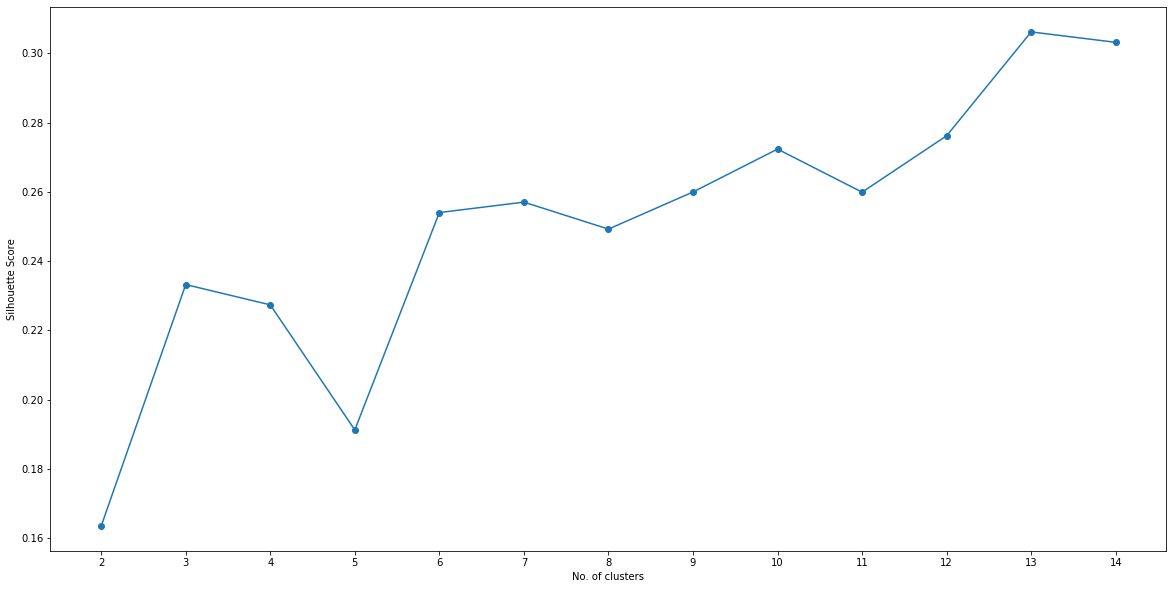

In [62]:
plot(max_range , scores, "No. of clusters", "Silhouette Score")

### So with using the Ellbow Methode we see that 5 is the best number of clusters for our case. Two would be too few cluster. So we would get proper information gain out of it

In [63]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 4, 4, 3, 4, 1, 3])

In [64]:
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [65]:
bl_final = coordinates_neigh
bl_final = bl_final.join(district_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')
bl_final.dropna(inplace = True)
bl_final['Cluster Labels'] = bl_final['Cluster Labels'].astype(int)
bl_final.head()

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Mitte,52.517885,13.404060,1,Restaurant,German Restaurant,Spanish Restaurant,Comfort Food Restaurant,Greek Restaurant
1,Tiergarten,52.509778,13.357260,3,German Restaurant,Scandinavian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant
3,Moabit,52.530102,13.342542,1,Vegetarian / Vegan Restaurant,Restaurant,Austrian Restaurant,German Restaurant,Peruvian Restaurant
4,Hansaviertel,52.519123,13.341872,1,Turkish Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant
5,Gesundbrunnen,52.550920,13.384846,1,Turkish Restaurant,Italian Restaurant,Syrian Restaurant,Restaurant,Halal Restaurant


In [69]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# Setup color scheme for different clusters
x = np.arange(bl_clusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(bl_final['Latitude'], bl_final['Longitude'], bl_final['Neighborhoods'], 
                                  bl_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

## 5. Examine Clusters



### First Cluster is best for getting mainly Doner or Oriental Food

In [68]:
val = 1
bl_final.loc[bl_final['Cluster Labels'] == (val - 1), bl_final.columns[[0] + np.arange(4, bl_final.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Friedrichshain,Middle Eastern Restaurant,Doner Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant
28,Spandau,Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant,Halal Restaurant
40,Zehlendorf,Italian Restaurant,Doner Restaurant,Asian Restaurant,German Restaurant,Fast Food Restaurant
46,Tempelhof,Doner Restaurant,Italian Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant
49,Lichtenrade,Doner Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
83,Fennpfuhl,Doner Restaurant,Italian Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant
89,Frohnau,Restaurant,Italian Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant


### Second Cluster is more like completely mixed types of restaurants

In [47]:
val = 2
bl_final.loc[bl_final['Cluster Labels'] == (val - 1), bl_final.columns[[0] + np.arange(4, bl_final.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Mitte,Restaurant,German Restaurant,Spanish Restaurant,Comfort Food Restaurant,Greek Restaurant
3,Moabit,Vegetarian / Vegan Restaurant,Restaurant,Austrian Restaurant,German Restaurant,Peruvian Restaurant
4,Hansaviertel,Turkish Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant
5,Gesundbrunnen,Turkish Restaurant,Italian Restaurant,Syrian Restaurant,Restaurant,Halal Restaurant
7,Kreuzberg,German Restaurant,Turkish Restaurant,Italian Restaurant,Korean Restaurant,Kurdish Restaurant
8,Prenzlauer Berg,Falafel Restaurant,French Restaurant,Sushi Restaurant,Vietnamese Restaurant,Doner Restaurant
10,Blankenburg,Greek Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,German Restaurant
11,Heinersdorf,Chinese Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant
14,Pankow,Turkish Restaurant,Asian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant
20,Wilhelmsruh,Mexican Restaurant,Vietnamese Restaurant,Italian Restaurant,Halal Restaurant,Greek Restaurant


### Third cluster mainly consists out of neighborhoods with not so much data

In [48]:
val = 3
bl_final.loc[bl_final['Cluster Labels'] == (val - 1), bl_final.columns[[0] + np.arange(4, bl_final.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
13,Stadtrandsiedlung Malchow,Restaurant,Italian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
31,Staaken,Restaurant,Italian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
54,Gropiusstadt ...,Restaurant,Italian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
67,Grünau,Restaurant,Italian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
75,Friedrichsfelde,Restaurant,Italian Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant


### Fourth cluster is good for mainly eating German food

In [49]:
val = 4
bl_final.loc[bl_final['Cluster Labels'] == (val - 1), bl_final.columns[[0] + np.arange(4, bl_final.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Tiergarten,German Restaurant,Scandinavian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant
9,Weißensee,German Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant
19,Rosenthal,German Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant
24,Grunewald,German Restaurant,Eastern European Restaurant,Italian Restaurant,Vietnamese Restaurant,Doner Restaurant
41,Dahlem,German Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant
51,Britz,German Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant
64,Köpenick,Indian Restaurant,German Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant
68,Müggelheim,American Restaurant,German Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant
70,Marzahn,Asian Restaurant,German Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant
79,Malchow,German Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant


### Fifth cluster is good for mainly eating Italien and Vitetnamese food

In [50]:
val = 5
bl_final.loc[bl_final['Cluster Labels'] == (val - 1), bl_final.columns[[0] + np.arange(4, bl_final.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,Buch,Asian Restaurant,Italian Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant
18,Niederschönhausen,Thai Restaurant,Italian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant
23,Schmargendorf,Italian Restaurant,Restaurant,Chinese Restaurant,Doner Restaurant,Halal Restaurant
25,Westend,Fast Food Restaurant,Italian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant
32,Gatow,Italian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant
38,Lichterfelde ...,Italian Restaurant,Eastern European Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant
53,Rudow,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant
62,Bohnsdorf,Italian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant
69,Schmöckwitz,Italian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant,Greek Restaurant
73,Mahlsdorf,Greek Restaurant,Italian Restaurant,Vietnamese Restaurant,Doner Restaurant,Halal Restaurant
